In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

#reading data
url="https://raw.githubusercontent.com/codejawk/HEAD-BRAIN/master/brainweight.txt"
names=['gender','Age Range','Head Size(cm^3)','Brain Weight(grams)']

data = pd.read_csv(url,names=names)
print(data.shape)
data.head()

(237, 4)


,gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [7]:
2+3

5

In [7]:
#collecting X and Y
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [8]:
# Mean of X and Y
mean_X=np.mean(X)
mean_Y=np.mean(Y)

#total no.of values
m=len(X)

#using the formula to calculate b1 and b2
numer=0
denom=0
for i in range(m):
    numer+=(X[i]-mean_X)*(Y[i]-mean_Y)
    denom+=(X[i]-mean_X)**2
b1=numer/denom
b0=mean_Y-(b1*mean_X)
    
#print coefficients
print(b1,b0)

0.26342933948939945 325.57342104944223


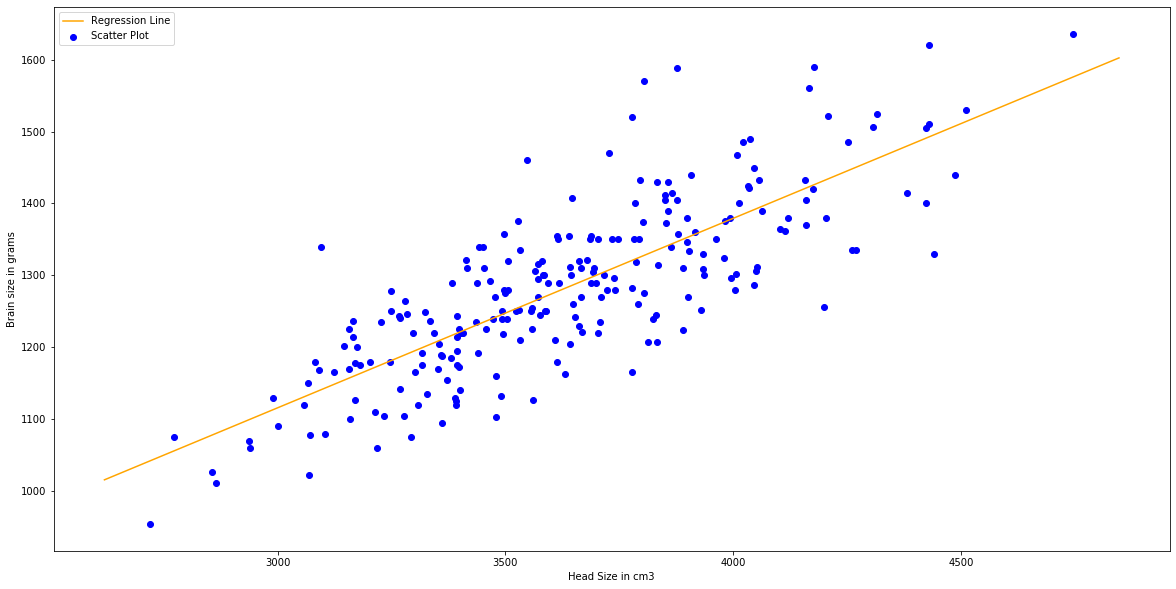

In [9]:
#plotting values and regression line
max_x=np.max(X)+100
min_x=np.min(X)-100

#calculating line values x and y
x=np.linspace(min_x, max_x,1000)
y=b0+b1*x

#plotting line
plt.plot(x,y,color='orange',label='Regression Line')
#plotting scatter points

plt.scatter(X,Y,c="blue",label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain size in grams')
plt.legend()
plt.show()


In [10]:
ss_t=0
ss_r=0
for i in range(m):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_Y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use rank1 matrix in scikit learn
X=X.reshape((m,1))

#creating model
reg=LinearRegression()
#fitting traing data
reg=reg.fit(X,Y)
#Y prediction
Y_pred=reg.predict(X)

#calculation R2 score
r2_score=reg.score(X,Y)
print(r2_score)

0.639311719957
